In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.api.types import is_string_dtype, is_numeric_dtype
%matplotlib inline

In [2]:
data=pd.read_csv("FinalSample.csv")

In [3]:
data.columns

Index(['RecipeId', 'Name', 'RecipeCategory', 'AggregatedRating', 'ReviewCount',
       'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'CookTime', 'PrepTime', 'TotalTime',
       'Review_Class', 'IngredientsCount', 'minimum_rating', 'maximum_rating',
       'mean_of_rating'],
      dtype='object')

In [4]:
data.head(2)

,RecipeId,Name,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,3689,Amish Pot Roast,Very Low Carbs,5.0,17.0,337.3,11.0,3.5,138.5,812.7,...,52.0,6.0,0,0,0,average,8,0.0,5.0,4.375
1,176008,The Cavorting Chef's Fabulous Fruit Pizza,Dessert,5.0,7.0,447.8,20.7,7.9,39.8,302.7,...,4.8,10.0,15,25,40,average,9,5.0,5.0,5.000


In [5]:
dataNoNA = data.dropna()

In [6]:
dataNoNA.isnull().sum()

RecipeId               0
Name                   0
RecipeCategory         0
AggregatedRating       0
ReviewCount            0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeServings         0
CookTime               0
PrepTime               0
TotalTime              0
Review_Class           0
IngredientsCount       0
minimum_rating         0
maximum_rating         0
mean_of_rating         0
dtype: int64

In [7]:
print(dataNoNA.shape)

(10000, 23)


In [8]:
#Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier
#df.time_diff.quantile([0.25,0.5,0.75])

for column in data:
    if is_numeric_dtype(data[column]):
        first = data[column].quantile(.25)
        third = data[column].quantile(.75)
        iqr = third-first
        value = (1.5*iqr)+third
        print(column+' : '+str(round(value,2)))


RecipeId : 566025.38
AggregatedRating : 5.75
ReviewCount : 24.12
Calories : 704.3
FatContent : 40.35
SaturatedFatContent : 16.95
CholesterolContent : 199.59
SodiumContent : 1367.1
CarbohydrateContent : 76.1
FiberContent : 7.1
SugarContent : 26.15
ProteinContent : 48.0
RecipeServings : 14.0
CookTime : 85.0
PrepTime : 42.5
TotalTime : 120.0
IngredientsCount : 17.5
minimum_rating : 10.0
maximum_rating : 5.0
mean_of_rating : 5.74


In [9]:
dataClean = dataNoNA[(dataNoNA.Calories<=1061.45) & (dataNoNA.FatContent<=60.1) & (dataNoNA.SaturatedFatContent<=24.75)& 
                     (dataNoNA.CholesterolContent<=264.05)& (dataNoNA.SodiumContent<=1795.55)& (dataNoNA.CarbohydrateContent<=108.55)& 
                     (dataNoNA.FiberContent<=10.3)& (dataNoNA.SugarContent<=41)& (dataNoNA.ProteinContent<=57.25)]

In [10]:
dataClean.shape

(10000, 23)

In [11]:
dataCleanFinal = dataClean[(dataClean.TotalTime<=1440)]

In [12]:
dataCleanFinal.shape

(10000, 23)

In [13]:
Final_Data = dataCleanFinal

In [14]:
Final_Data.head(2)

,RecipeId,Name,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,3689,Amish Pot Roast,Very Low Carbs,5.0,17.0,337.3,11.0,3.5,138.5,812.7,...,52.0,6.0,0,0,0,average,8,0.0,5.0,4.375
1,176008,The Cavorting Chef's Fabulous Fruit Pizza,Dessert,5.0,7.0,447.8,20.7,7.9,39.8,302.7,...,4.8,10.0,15,25,40,average,9,5.0,5.0,5.000


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='RecipeId'>

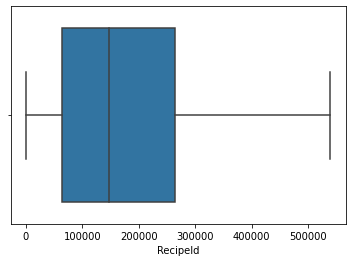

In [15]:
sns.boxplot(Final_Data['RecipeId'], orient = 'v')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Recipe Id')

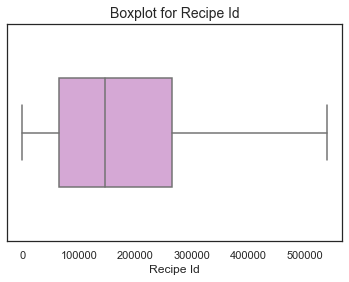

In [16]:
# set style
sns.set(style='white')

# set figure size
#fig. ax = plt.subplots(figsize=(10,2))

# create boxplot
sns.boxplot(Final_Data['RecipeId'], color="plum", width = .5)

# title and x-label
plt.title('Boxplot for Recipe Id', fontsize=14)
plt.xlabel('Recipe Id')



C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Calories')

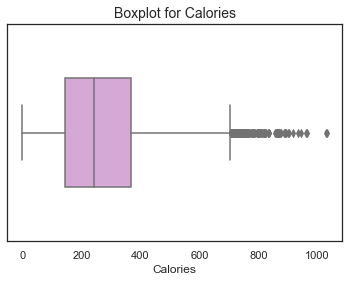

In [17]:
sns.boxplot(Final_Data['Calories'], color="plum", width = .5)

plt.title('Boxplot for Calories', fontsize=14)
plt.xlabel('Calories')


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'FatContent')

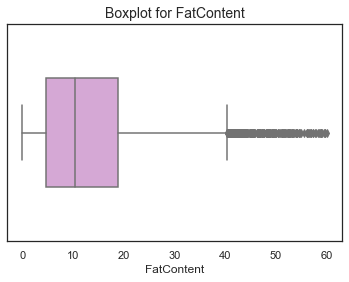

In [18]:
sns.boxplot(Final_Data['FatContent'], color="plum", width = .5)

plt.title('Boxplot for FatContent', fontsize=14)
plt.xlabel('FatContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SaturatedFatContent')

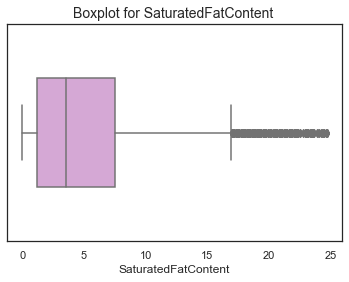

In [19]:
sns.boxplot(Final_Data['SaturatedFatContent'], color="plum", width = .5)

plt.title('Boxplot for SaturatedFatContent ', fontsize=14)
plt.xlabel('SaturatedFatContent')


C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'minimum_rating')

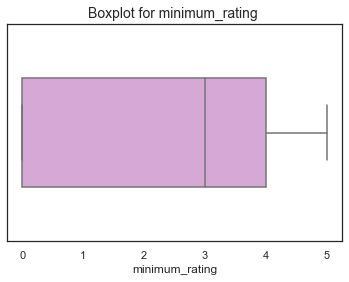

In [20]:
sns.boxplot(Final_Data['minimum_rating'], color="plum", width = .5)

plt.title('Boxplot for minimum_rating ', fontsize=14)
plt.xlabel('minimum_rating')




C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'SodiumContent')

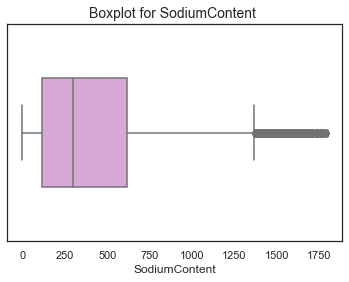

In [21]:
sns.boxplot(Final_Data['SodiumContent'], color="plum", width = .5)

plt.title('Boxplot for SodiumContent ', fontsize=14)
plt.xlabel('SodiumContent')



C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CarbohydrateContent')

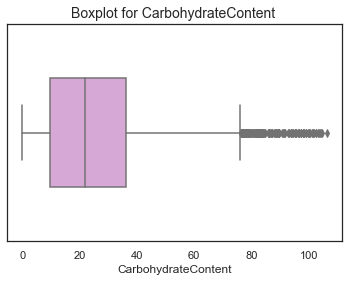

In [22]:
sns.boxplot(Final_Data['CarbohydrateContent'], color="plum", width = .5)

plt.title('Boxplot for CarbohydrateContent ', fontsize=14)
plt.xlabel('CarbohydrateContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ProteinContent')

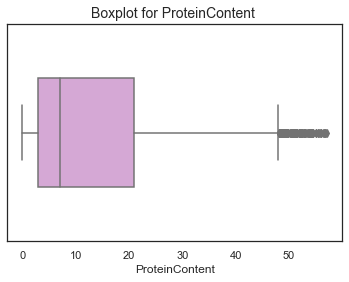

In [23]:
sns.boxplot(Final_Data['ProteinContent'], color="plum", width = .5)

plt.title('Boxplot for ProteinContent ', fontsize=14)
plt.xlabel('ProteinContent')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'RecipeServings')

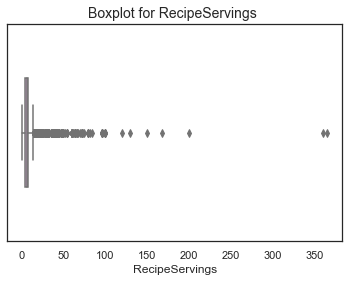

In [24]:
sns.boxplot(Final_Data['RecipeServings'], color="plum", width = .5)

plt.title('Boxplot for RecipeServings ', fontsize=14)
plt.xlabel('RecipeServings')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CookTime')

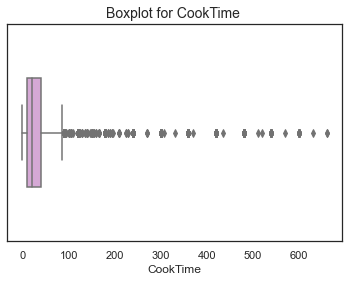

In [25]:
sns.boxplot(Final_Data['CookTime'], color="plum", width = .5)

plt.title('Boxplot for CookTime ', fontsize=14)
plt.xlabel('CookTime')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'PrepTime')

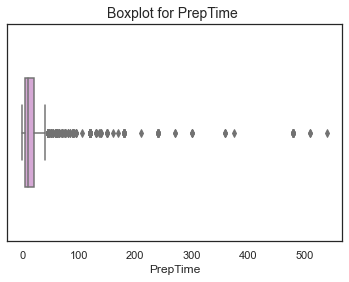

In [26]:
sns.boxplot(Final_Data['PrepTime'], color="plum", width = .5)

plt.title('Boxplot for PrepTime ', fontsize=14)
plt.xlabel('PrepTime')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'TotalTime')

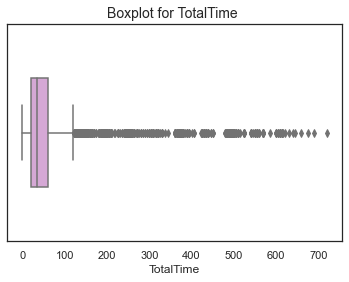

In [27]:
sns.boxplot(Final_Data['TotalTime'], color="plum", width = .5)

plt.title('Boxplot for TotalTime ', fontsize=14)
plt.xlabel('TotalTime')

In [28]:
#sns.boxplot(Final_Data['Review_Class'], color="plum", width = .5)

#plt.title('Boxplot for Review_Class ', fontsize=14)
#plt.xlabel('Review_Class')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'IngredientsCount')

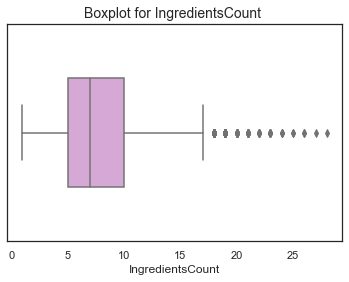

In [29]:
sns.boxplot(Final_Data['IngredientsCount'], color="plum", width = .5)

plt.title('Boxplot for IngredientsCount ', fontsize=14)
plt.xlabel('IngredientsCount')

In [30]:
#sns.boxplot(Final_Data[''], color="plum", width = .5)

#plt.title('Boxplot for maximum_rating ', fontsize=14)
#plt.xlabel('maximum_rating')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'mean_of_rating')

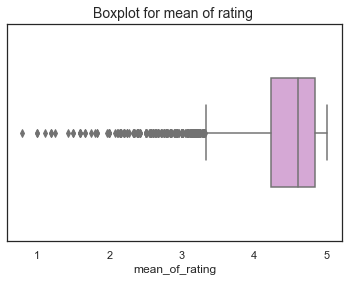

In [31]:
sns.boxplot(Final_Data['mean_of_rating'], color="plum", width = .5)

plt.title('Boxplot for mean of rating ', fontsize=14)
plt.xlabel('mean_of_rating')

C:\Users\EUNICE O KYEREMATENG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'ReviewCount')

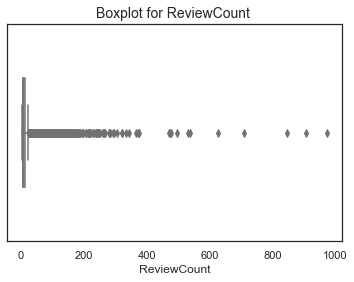

In [32]:
sns.boxplot(Final_Data['ReviewCount'], color="plum", width = .5)

plt.title('Boxplot for ReviewCount ', fontsize=14)
plt.xlabel('ReviewCount')